## Importing Libraries

In [1]:
import camelot as cm
import seaborn as sns
from matplotlib import pyplot as plt

## Reading Video's Data

In [28]:
tables = cm.read_pdf("india_factsheet_economic_n_hdi.pdf",flavor='lattice',pages='1,2')

In [29]:
tables

<TableList n=4>

In [30]:
for n in tables:
    print(n)

<Table shape=(4, 3)>
<Table shape=(15, 3)>
<Table shape=(14, 4)>
<Table shape=(13, 3)>


In [31]:
tables[2].df

,0,1,2,3
0,Human Development Indicators,,2000,2011
1,13,Human Development Index Value (HDI),0.461,0.547
2,14,HDI Rank (out of 187),,134
3,15,Inequality Adjusted Human Development Index Value,,0.392
4,16,Loss in HDI due to Inequalities (%),,28.7
5,,,2001,2011
6,17,Gender Inequality Index (GII),0.5531,0.617
7,18,GII Rank (out of 146),,129
8,,,1996,2006
9,19,Gender Empowerment Measure (GEM),0.416,0.497


In [33]:
df = tables[2].df.loc[11:14]
df

,0,1,2,3
11,20,Literacy Rate (%),64.8,74.04
12,21,Male Literacy Rate (%),75.3,82.14
13,22,Female Literacy Rate (%),53.7,65.46


In [7]:
df = df.reset_index(drop = True)
df

,1,2,3
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [8]:
df.columns = ["KPI","2001","2011"]
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [9]:
df.loc[:,["2001","2011"]] = df.loc[:,["2001","2011"]].astype(float)
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [10]:
df.to_csv("tables_output.csv")
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


## Creating Excel File

In [11]:
df.to_excel("tables_output_excel.xlsx")

In [12]:
df_melted = df.melt('KPI', var_name='year', value_name='percentage')
df_melted

,KPI,year,percentage
0,Literacy Rate (%),2001,64.8
1,Male Literacy Rate (%),2001,75.3
2,Female Literacy Rate (%),2001,53.7
3,Literacy Rate (%),2011,74.04
4,Male Literacy Rate (%),2011,82.14
5,Female Literacy Rate (%),2011,65.46


## Creating Barplot

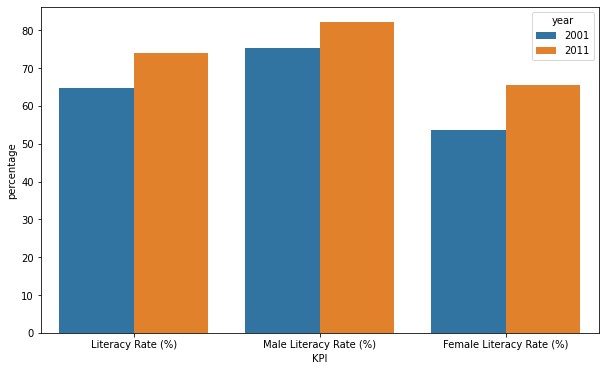

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x = "KPI", y = "percentage", hue = "year", data = df_melted);

## Custom Dataset

In [55]:
tables = cm.read_pdf("gst_data.pdf",pages='2,3,4',header=False)

In [56]:
tables

<TableList n=5>

In [57]:
tables[0].df

,0,1,2,3
0,State,Jul-21,Jul-22,Growth
1,Jammu and Kashmir,432,431,0%
2,Himachal Pradesh,667,746,12%
3,Punjab,"1,533","1,733",13%
4,Chandigarh,169,176,4%
5,Uttarakhand,"1,106","1,390",26%
6,Haryana,"5,330","6,791",27%
7,Delhi,"3,815","4,327",13%
8,Rajasthan,"3,129","3,671",17%
9,Uttar Pradesh,"6,011","7,074",18%


In [58]:
df = tables[0].df
df

,0,1,2,3
0,State,Jul-21,Jul-22,Growth
1,Jammu and Kashmir,432,431,0%
2,Himachal Pradesh,667,746,12%
3,Punjab,"1,533","1,733",13%
4,Chandigarh,169,176,4%
5,Uttarakhand,"1,106","1,390",26%
6,Haryana,"5,330","6,791",27%
7,Delhi,"3,815","4,327",13%
8,Rajasthan,"3,129","3,671",17%
9,Uttar Pradesh,"6,011","7,074",18%


In [59]:
df = df.drop(0)

In [63]:
df.columns = ["State","Jul-21","Jul-22","Growth"]
df

,State,Jul-21,Jul-22,Growth
1,Jammu and Kashmir,432,431,0%
2,Himachal Pradesh,667,746,12%
3,Punjab,"1,533","1,733",13%
4,Chandigarh,169,176,4%
5,Uttarakhand,"1,106","1,390",26%
6,Haryana,"5,330","6,791",27%
7,Delhi,"3,815","4,327",13%
8,Rajasthan,"3,129","3,671",17%
9,Uttar Pradesh,"6,011","7,074",18%
10,Bihar,"1,281","1,264",-1%


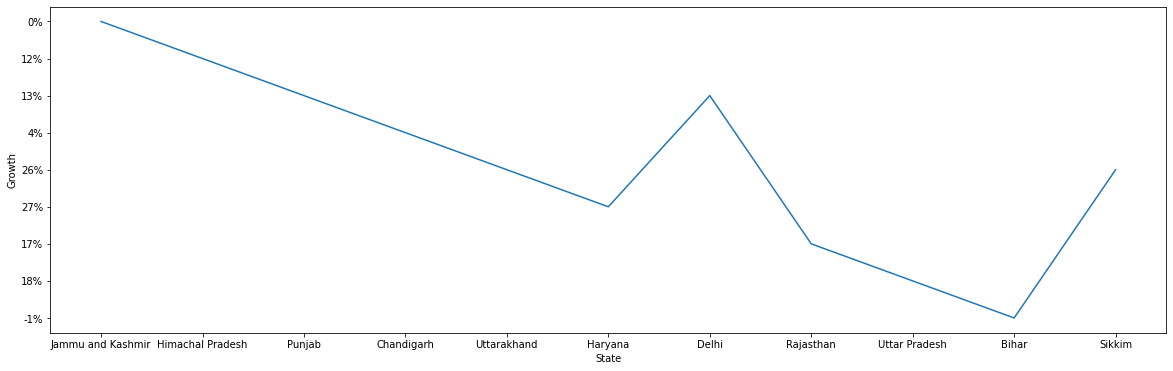

In [80]:
plt.figure(figsize=(20,6))
sns.lineplot(x = "State", y = "Growth", data = df);